<a href="https://colab.research.google.com/github/Sarah4045/EDA-on-Employee-Attrition-R/blob/main/Data_Analysis_By_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# pandas - numpy - matplotlib - seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/fake_customer_data_with_errors.csv')

## **1- Explore Data** **bold text**

In [ ]:
#df.head()
#df.tail()
df.sample(6)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
1414,CUST2414,Sara Ibrahim,NaN,Male,sara.ibrahim@hotmail.com,123456789.0,831.52,2025-03-15,Home,2.0,NaN,Male
2056,CUST3056,Mark Mahmoud,-1.0,M,mark.mahmoud@yahoo.com,987654321.0,199.47,2024-05-21,Toys,3.0,NaN,M
1440,CUST2440,Mark Gaber,-1.0,M,mark.gaber@gmail.com,NaN,491.42,2024-05-14,Electronics,10.0,NaN,M
826,CUST1826,Ali Mahmoud,31.0,female,ali.mahmoud@gmail.com,987654321.0,897.67,2023-06-27,NaN,1.0,NaN,female
1167,CUST2167,Ali Ibrahim,44.0,M,ali.ibrahim@gmail.com,NaN,NaN,2024-09-27,Home,4.0,NaN,M
2088,CUST3088,John Hassan,200.0,Female,john.hassan@gmail.com,NaN,680.25,2023-03-23,Electronics,10.0,NaN,Female


In [ ]:
df.shape

(2150, 12)

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [ ]:
df.duplicated().sum()

np.int64(50)

In [ ]:
df.nunique()

,0
CustomerID,2100
Name,48
Age,78
Gender,6
Email,144
Phone,2
PurchaseAmount,1991
PurchaseDate,860
ProductCategory,5
Rating,6


In [ ]:
#df.isnull().sum()
df.isna().sum()

,0
CustomerID,0
Name,0
Age,520
Gender,273
Email,0
Phone,1078
PurchaseAmount,101
PurchaseDate,0
ProductCategory,577
Rating,329


In [ ]:
df.describe()

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


## **2- Clean Data**


In [ ]:
df=df.drop(columns=['Unnamed', '  Gender  '])

In [ ]:
df.head(3)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0


In [ ]:
df['Add']=1

In [ ]:
df.sample(6)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
1397,CUST2397,Alaa Mahmoud,-1.0,F,alaa.mahmoud@gmail.com,123456789.0,970.58,2024-01-27,Home,3.0,1
494,CUST1494,Ahmed Hassan,NaN,female,ahmed.hassan@hotmail.com,123456789.0,778.69,2023-04-08,NaN,4.0,1
1365,CUST2365,Sara Smith,NaN,male,sara.smith@gmail.com,NaN,374.82,2023-10-29,Electronics,1.0,1
1095,CUST2095,John Hassan,89.0,Female,john.hassan@hotmail.com,987654321.0,358.39,2024-02-28,Books,5.0,1
36,CUST1036,Sara Ali,70.0,female,sara.ali@yahoo.com,NaN,542.06,2023-01-12,Electronics,NaN,1
1566,CUST2566,Sara Hassan,200.0,Female,sara.hassan@gmail.com,987654321.0,80.50,2024-07-03,Clothing,5.0,1


In [ ]:
#df.drop_duplicates(inplace=True)
df=df.drop_duplicates()

In [ ]:
df.shape

(2100, 11)

In [ ]:
df['Gender'].unique()

array([nan, 'Female', 'male', 'F', 'M', 'female', 'Male'], dtype=object)

In [ ]:
df['Gender']=df['Gender'].str.lower()

/tmp/ipython-input-1900502736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].str.lower()


In [ ]:
df['Gender'].replace({'m':'Male','f':'Female','male':'Male'}, inplace=True)


/tmp/ipython-input-2982356339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'m':'Male','f':'Female','male':'Male'}, inplace=True)


In [ ]:
df['Gender'].fillna('male',inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
df['ProductCategory']=df['ProductCategory'].fillna('Unknown')

In [ ]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')

In [ ]:
df['Age']=df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x)

/tmp/ipython-input-2941709652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x)


In [ ]:
df=df.dropna()

# **# 3- Data Analysis**


In [ ]:
df.sort_values(by=['PurchaseAmount','Rating'],ascending=False).head(10)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add,Month
687,CUST1687,Alaa Ibrahim,200.000000,female,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0,1,5
424,CUST1424,John Ali,80.000000,Male,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,1,6
386,CUST1386,Fatma Ali,200.000000,female,fatma.ali@hotmail.com,123456789.0,995.55,2022-11-12,Clothing,4.0,1,11
335,CUST1335,Alaa Mahmoud,85.044542,female,alaa.mahmoud@yahoo.com,123456789.0,995.41,2024-02-11,Toys,3.0,1,2
1449,CUST2449,John Mahmoud,85.044542,female,john.mahmoud@yahoo.com,987654321.0,989.99,2024-11-28,Unknown,1.0,1,11
95,CUST1095,Lina Ali,31.000000,Male,lina.ali@gmail.com,987654321.0,989.50,2025-06-14,Clothing,5.0,1,6
1730,CUST2730,John Smith,85.044542,Male,john.smith@gmail.com,987654321.0,988.31,2024-01-17,Unknown,2.0,1,1
1281,CUST2281,Ahmed Smith,55.000000,Male,ahmed.smith@gmail.com,123456789.0,986.30,2025-03-26,Electronics,3.0,1,3
1247,CUST2247,Fatma Hassan,85.044542,Male,fatma.hassan@hotmail.com,123456789.0,986.02,2022-12-24,Home,4.0,1,12
1773,CUST2773,Sara Smith,63.000000,female,sara.smith@hotmail.com,123456789.0,984.51,2025-06-19,Unknown,1.0,1,6


In [ ]:
df['ProductCategory'].value_counts()

,count
ProductCategory,
Unknown,215
Books,130
Electronics,130
Clothing,119
Home,115
Toys,102


In [ ]:
df['Rating'].value_counts().sort_index()

,count
Rating,
1.0,129
2.0,138
3.0,161
4.0,118
5.0,133
10.0,132


In [ ]:
gender_counts=df['Gender'].value_counts()
gender_counts

,count
Gender,
Male,480
female,331


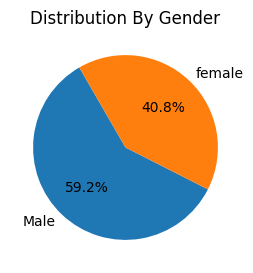

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=120)
plt.title('Distribution By Gender')
plt.show()

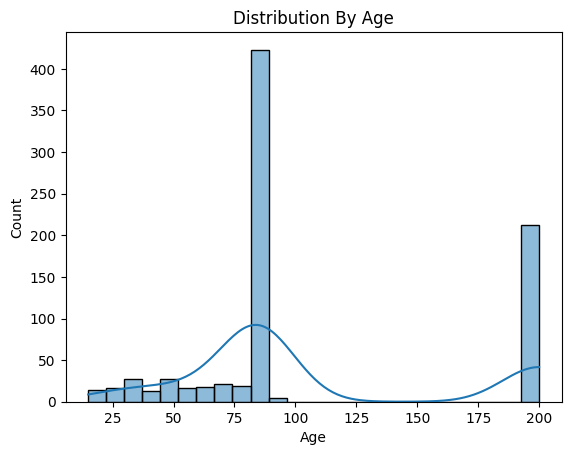

In [ ]:
sns.histplot(df['Age'],bins=25,kde=True)
plt.title('Distribution By Age')
plt.show()

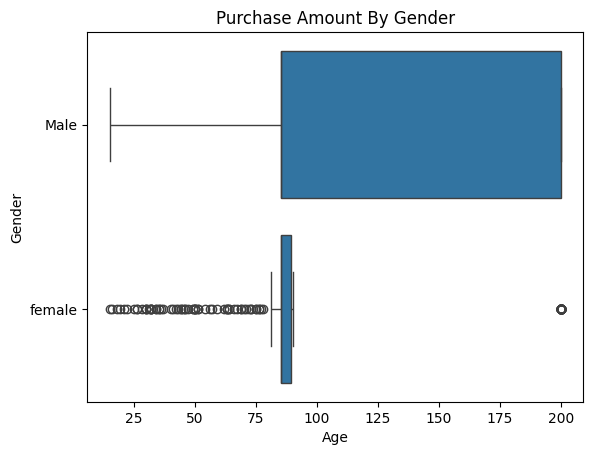

In [ ]:
sns.boxplot(data=df,x='Age',y='Gender')
plt.title('Purchase Amount By Gender')
plt.show()

In [ ]:
corr=df[['Age','Rating','PurchaseAmount']].corr()

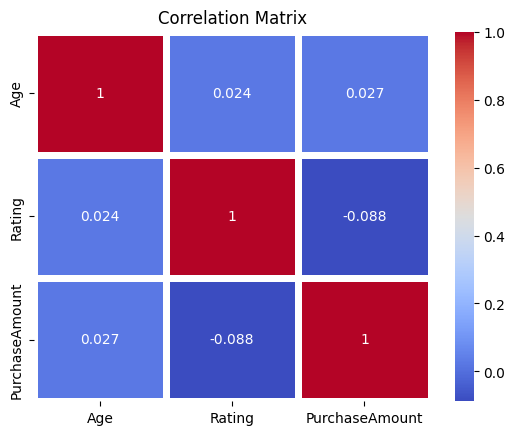

In [ ]:
sns.heatmap(corr,annot=True,linewidths=5,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

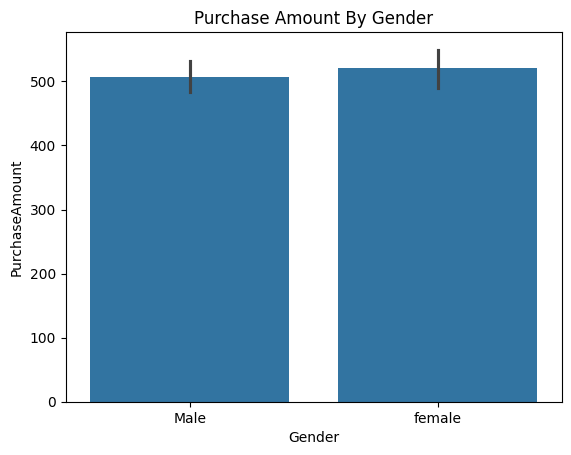

In [ ]:
sns.barplot(data=df,x='Gender',y='PurchaseAmount',estimator='mean')
plt.title('Purchase Amount By Gender')
plt.show()

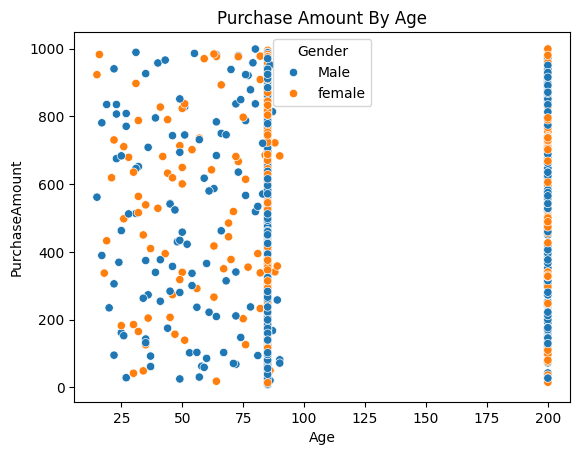

In [ ]:
sns.scatterplot(data=df,x='Age',y='PurchaseAmount',hue='Gender')
plt.title('Purchase Amount By Age')
plt.show()

In [ ]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [ ]:
df['Month']=df['PurchaseDate'].dt.month

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add,Month
0,CUST1000,Ali Hassan,72.000000,Male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1,10
4,CUST1004,Ali Ibrahim,73.000000,Male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1,12
5,CUST1005,Alaa Ibrahim,85.044542,female,alaa.ibrahim@hotmail.com,987654321.0,886.26,2025-01-16,Unknown,2.0,1,1
7,CUST1007,Alaa Hassan,200.000000,female,alaa.hassan@hotmail.com,987654321.0,318.43,2024-05-17,Toys,10.0,1,5
10,CUST1010,Ahmed Smith,85.044542,Male,ahmed.smith@gmail.com,987654321.0,882.19,2025-06-24,Unknown,3.0,1,6


In [ ]:
monthly_sales=df.groupby('Month')['PurchaseAmount'].sum()

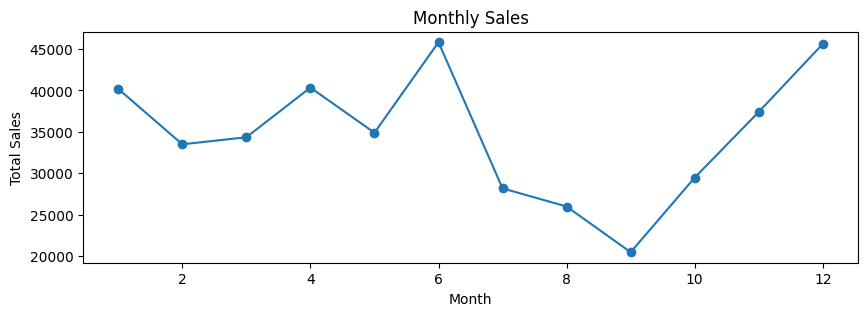

In [ ]:
monthly_sales.plot(figsize=(10,3),kind='line',marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
df.to_csv('Clean_Data_2025',index=False)